In [28]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
## 读取表格数据
## Read all sheets from the Excel file
data = pd.read_excel('Concrete_Data.xls')


In [22]:
data.head

<bound method NDFrame.head of       水泥Cement (component 1)(kg in a m^3 mixture)  \
0                                           540.0   
1                                           540.0   
2                                           332.5   
3                                           332.5   
4                                           198.6   
...                                           ...   
1025                                        276.4   
1026                                        322.2   
1027                                        148.5   
1028                                        159.1   
1029                                        260.9   

      高炉矿渣Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0           
1                                                   0.0           
2                                                 142.5           
3                                                 142.5          

In [23]:
# Split the data into input features and target variable
X = data.iloc[:, :-1]  # Input features (all columns except the last one)
y = data.iloc[:, -1]   # Target variable (last column)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [29]:


# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 95.98
R-squared (R2): 0.63


In [30]:
# Example prediction for a new sample
new_sample = [[500.0, 50.0, 100.0, 200.0, 5.0, 900.0, 700.0, 14]]

prediction = model.predict(new_sample)
print(f"Predicted Concrete compressive strength: {prediction[0]:.2f} MPa")

Predicted Concrete compressive strength: 53.39 MPa


/Users/wangxinyi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


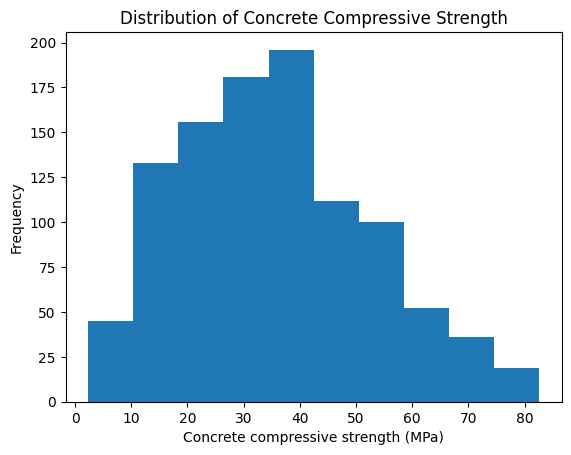

In [32]:
import matplotlib.pyplot as plt

# Plot a histogram of the target variable
plt.hist(data['混凝土抗压强度Concrete compressive strength(MPa, megapascals) '], bins=10)
plt.xlabel('Concrete compressive strength (MPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Concrete Compressive Strength')
plt.show()

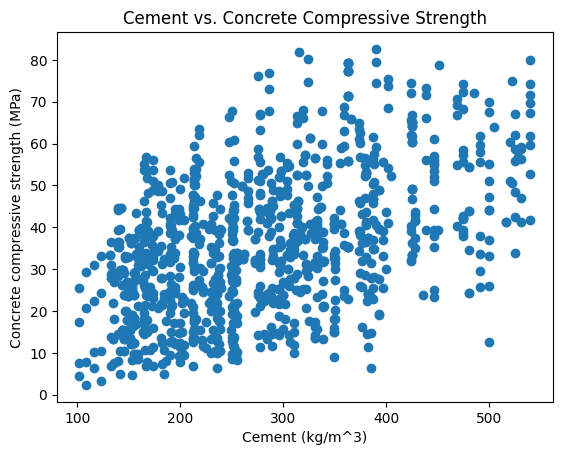

In [33]:
plt.scatter(data['水泥Cement (component 1)(kg in a m^3 mixture)'], data['混凝土抗压强度Concrete compressive strength(MPa, megapascals) '])
plt.xlabel('Cement (kg/m^3)')
plt.ylabel('Concrete compressive strength (MPa)')
plt.title('Cement vs. Concrete Compressive Strength')
plt.show()

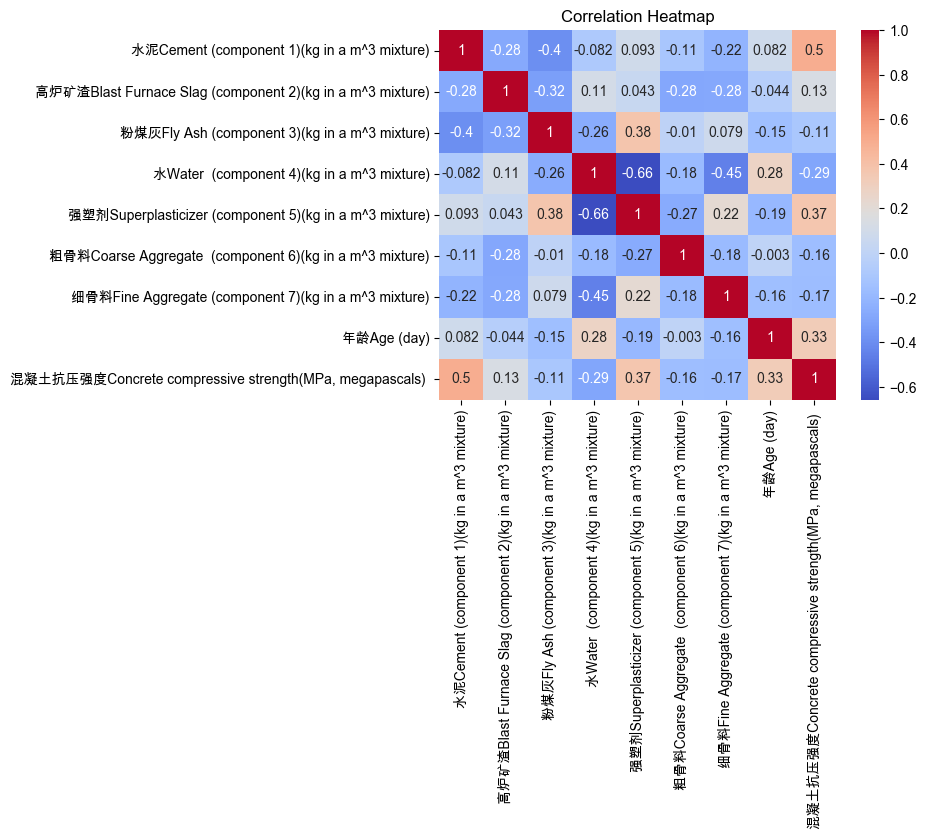

In [36]:
import seaborn as sns

# Set a font that supports the required characters
font = {'family': 'Arial Unicode MS'}  # Change to a font that supports the characters

# Set the font as the default font for Matplotlib
plt.rc('font', **font)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()